### Student Information
Name: 游堯中

Student ID: 107065533

GitHub ID: bill-yc-yu

Kaggle name: bill_yc_yu

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

# Take home exercises

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [18]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

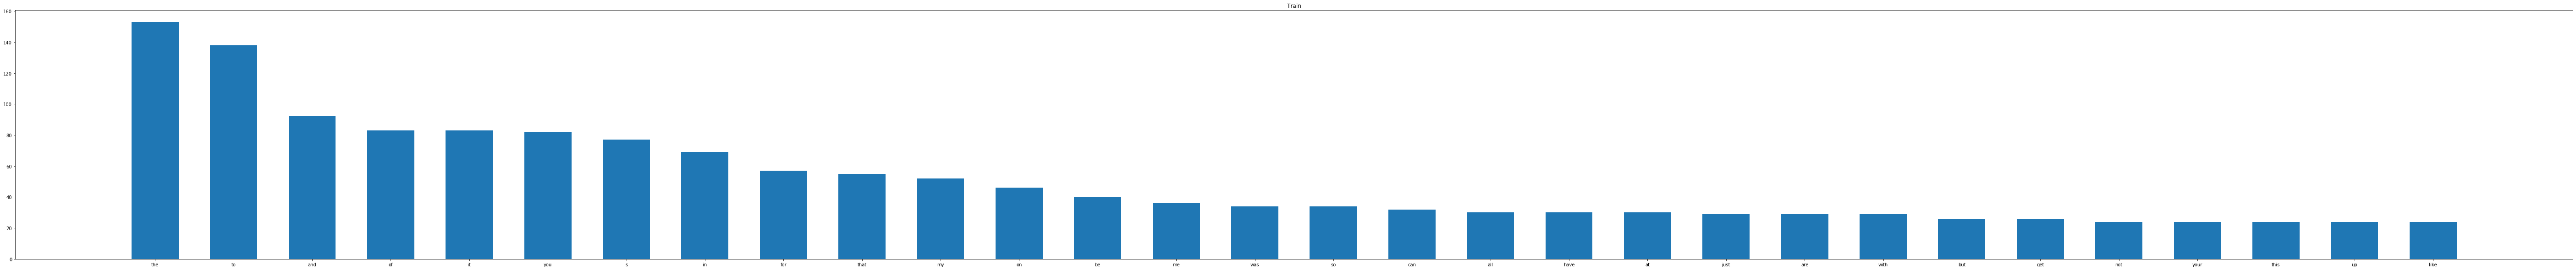

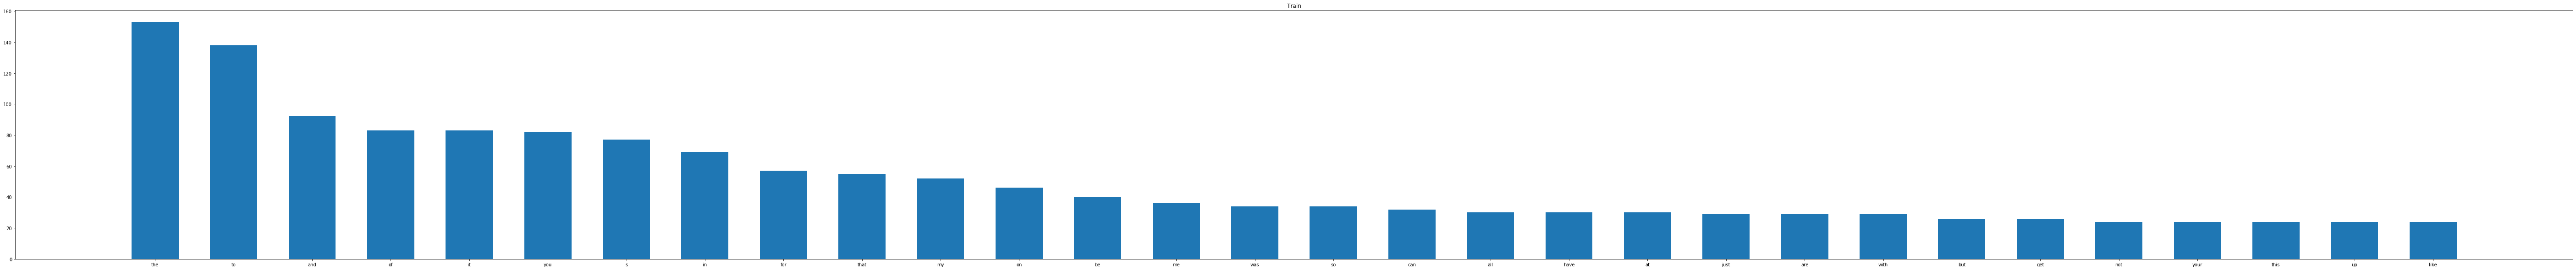

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,10))
plt.title('Train')
plt.bar(word, num, width=0.6)

vec = CountVectorizer().fit(test_df.text)
bag_of_words = vec.transform(test_df.text)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in    vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

word = []
num = []
for i in range(30):
    word.append(words_freq[i][0])
    num.append(words_freq[i][1])
    
plt.figure(figsize=(100,10))
plt.title('Train')
plt.bar(word, num, width=0.6)
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [11]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
BOW_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_1000.fit(train_df['text'])

train_data_BOW_features_1000 = BOW_1000.transform(train_df['text'])

feature_names_1000 = BOW_1000.get_feature_names()
feature_names_1000[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
![pic9](pics/pic9.png)
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

55,15,5,9 of the true "anger" label is predicted as "anger" "fear" "joy" "sadness" respectively

16,70,13,14 of the true "fear" label is predicted as "anger" "fear" "joy" "sadness" respectively etc

The bigger number, the darker box

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [17]:
from sklearn.tree import DecisionTreeClassifier
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

## so we get the pred result
y_test_pred_NB[:10]

from sklearn.metrics import accuracy_score

acc_train_NB = accuracy_score(y_true=y_train, y_pred=y_train_pred_NB)
acc_test_NB = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('training accuracy: {}'.format(round(acc_train_NB, 2)))
print('testing accuracy: {}'.format(round(acc_test_NB, 2)))

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

training accuracy: 0.79
testing accuracy: 0.72
              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.